# LAB 4: Gram-Schmidt and Eigenvalues & Eigenvectors



In this lab you will use Python to study the following topics:

- The Gram-Schmidt Algorithm to change an independent set of vectors into anorthonormal set.

- Determination of eigenvalues and eigenvectors using the characteristic polynomial of a matrix

- Use of eigenvectors to transform a matrix to diagonal form.


# First: you should run this cell

In [ ]:
## Name : Eslam Mohamed Mohamed
## Lab 4
## Date : 31/1/2022

In [1]:
# Make all numpy available via shorter 'np' prefix
import numpy as np
# Make all sympy available via shorter 'sym' prefix
import sympy as sym

import math


#import plotter
import matplotlib.pyplot as plt


def rvect(m):
    return np.fix((10 * (np.random.rand(m, 1))))


def rmat(m, n):
    return np.fix((10 * (np.random.rand(m, n))))

#  Question 1 : Gram-Schmidt Orthogonalization

#### Generate three random vectors in $R^3$ by

- `u1 = np.array([[4], [9], [6]])`
- `u2 = np.array([[6], [8], [8]])`
- `u3 = np.array([[0], [9], [6]])`

- Check whether they are linearly independent by calculating `np.linalg.matrix_rank(np.block([u1, u2, u3]))`.
- If the answer is not 3, then generate a new random set of vectors and calculate the rank. Repeat until the rank is 3. Now use these vectors in the following calculations.

In [2]:
#type your code here:
u1 = np.array([[4], [9], [6]])

u2 = np.array([[6], [8], [8]])

u3 = np.array([[0], [9], [6]])
print(f"-----u1---\n{u1}")
print(f"-----u2---\n{u2}")
print(f"-----u3---\n{u3}")

r=np.linalg.matrix_rank(np.block([u1, u2, u3]))
print(f"-----rank---\n{r}")


-----u1---
[[4]
 [9]
 [6]]
-----u2---
[[6]
 [8]
 [8]]
-----u3---
[[0]
 [9]
 [6]]
-----rank---
3


#### Plot the three vectors in the graphics window as red, green, and blue dotted lines by the commands:
- `r = np.arange(0, 1, 0.05)`
- `ax = plt.axes(projection='3d')`
- `ax.plot3D(r * u1[0], r * u1[1], r * u1[2], 'r:')`
- `ax.plot3D(r * u2[0], r * u2[1], r * u2[2], 'g:')`
- `ax.plot3D(r * u3[0], r * u3[1], r * u3[2], 'b:')`

#### Determine visually whether the vectors are mutually orthogonal or not.

### ---------------------------------------------------Write your answer here--------------------------------------------

# No They are not mutually orthogonal they seem like they are in the same direction on the plot. 





### --------------------------------------------------------------------------------------------------------------------------------

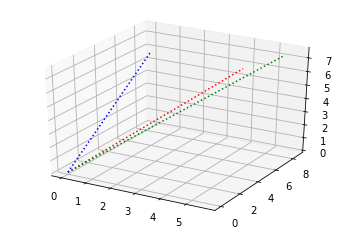

In [3]:
#type your code here
r = np.arange(0, 1, 0.05)
ax = plt.axes(projection='3d')
ax.plot3D(r * u1[0], r * u1[1], r * u1[2], 'r:')
ax.plot3D(r * u2[0], r * u2[1], r * u2[2], 'g:')
ax.plot3D(r * u3[0], r * u3[1], r * u3[2], 'b:')

#### (b) Now use the vectors u1, u2, u3 to obtain an orthogonal basis for R3, following the Gram-Schmidt algorithm. Set `v1 = u1`. Obtain v2 by removing the component of u2 in the direction v1:


\\[v_2 = u_2 - \frac{v_1 \cdot u_2}{v_1 \cdot v_1}v_1\\]

- Calculate the dot product to check that the vectors v1 and v2 are mutually orthogonal (within a negligible numerical error). Also add v2 to your graphics window as a dashed-dotted green line.

-----v1---
[[4]
 [9]
 [6]]
-----v2---
[[ 1.66917293]
 [-1.7443609 ]
 [ 1.5037594 ]]
-----v1 . v2 ---
[[0.]]


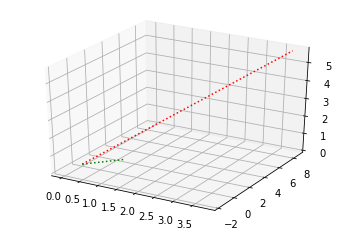

In [9]:
#type your code here
v1 = u1
v2 = u2 - ((v1.T @ u2)/ (v1.T @ v1)) * v1
print(f"-----v1---\n{v1}")
print(f"-----v2---\n{v2}")
print(f"-----v1 . v2 ---\n{v1.T @ v2}")

ux=plt.axes(projection='3d')
ux.plot3D(r * v1[0], r * v1[1], r * v1[2], 'r:')
ux.plot3D(r * v2[0], r * v2[1], r * v2[2], 'g:')


#### Now obtain v3 by removing the components of u3 in the directions of v1 and v2:

\\[v_3 = u_3 - \frac{v_1 \cdot u_3}{v_1 \cdot v_1}v_1 - \frac{v_2 \cdot u_3}{v_2 \cdot v_2}v_2\\\\]
- Calculate dot products by python to check that v3 is orthogonal to the vectors v1 and v2 (within a negligible numerical error). Add v3 to your plot as a dashed-dotted blue line by

In [11]:
#type your code here
v3 = u3 - ((v1.T @ u3)/ (v1.T @ v1)) * v1 - ((v2.T @ u3)/ (v2.T @ v2)) * v2 

print(f"-----v3-----\n{v3}")

print(f"-----v3 . v1 ---\n{v3.T @ v1}")

print(f"-----v3 . v2 ---\n{v3.T @ v2}")

-----v3-----
[[-2.14126394]
 [-0.35687732]
 [ 1.96282528]]
-----v3 . v1 ---
[[-3.55271368e-15]]
-----v3 . v2 ---
[[0.]]


#### Add v3 to your plot as a dashed-dotted blue line. Obtain a good alignment of the graph that shows orthogonality in perspective using:
- `ax.view_init(angle1, angle2)`

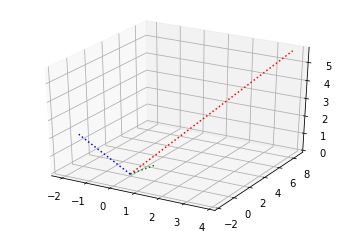

In [16]:
#type your code here
ax=plt.axes(projection='3d')
ax.plot3D(r * v1[0], r * v1[1], r * v1[2], 'r:')
ax.plot3D(r * v2[0], r * v2[1], r * v2[2], 'g:')
ax.plot3D(r * v3[0], r * v3[1], r * v3[2], 'b:')

#ax.view_init(0, 0)

#### (c) The last step in the Gram-Schmidt algorithm is to rescale the vectors v1, v2, v3 to obtain an orthonormal basis for R3:

- `w1 = v1 / np.linalg.norm(v1)`
- `w2 = v2 / np.linalg.norm(v2)`
- `w3 = v3 / np.linalg.norm(v3)`

#### Define the matrix Q = [w1, w2, w3] and give written answers to the following questions.



- What is the inverse matrix Q Now.

In [17]:
#type your code here:
w1 = v1 / np.linalg.norm(v1)
w2 = v2 / np.linalg.norm(v2)
w3 = v3 / np.linalg.norm(v3)

print(f"-----w1-----\n{w1}\n")
print(f"-----w2-----\n{w2}\n")
print(f"-----w3-----\n{w3}\n")


Q = np.block([w1,w2,w3])
print(f"-----Q-----\n{Q}\n")

print(f"-----Q(inv)---\n{np.linalg.inv(Q)}")

-----w1-----
[[0.34684399]
 [0.78039897]
 [0.52026598]]

-----w2-----
[[ 0.58684177]
 [-0.61327608]
 [ 0.52868628]]

-----w3-----
[[-0.73165291]
 [-0.12194215]
 [ 0.67068184]]

-----Q-----
[[ 0.34684399  0.58684177 -0.73165291]
 [ 0.78039897 -0.61327608 -0.12194215]
 [ 0.52026598  0.52868628  0.67068184]]

-----Q(inv)---
[[ 0.34684399  0.78039897  0.52026598]
 [ 0.58684177 -0.61327608  0.52868628]
 [-0.73165291 -0.12194215  0.67068184]]


# Question 2. Eigenvectors and Diagonalization

#### (a) Generate a random 3 * 3 integer matrix and test whether its eigenvalues are all real by the commands

- `A = rmat(3,3)`
- Use [numpy.linalg.eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html) to obtain the eigenvalues of `A` as follows:
    - `w, v = np.linalg.eig(A)`. Where `w` are the eigenvalues and `v`the normalized (unit “length”) eigenvectors, such that the column `v[:,i]` is the eigenvector corresponding to the eigenvalue `w[i]`.
- `z = w - w.real`

If any entry in the vector z is not zero, then the eigenvalues of A are not all real. In this case repeat these commands until you get an A for which z has all zeros.

<div class="alert alert-warning">
    <h4>
        If you generated any matrices with complex eigenvalues, be very careful here! don't use it for the next questions!
    </h4>
</div>

In [27]:
#type your code here:
A = rmat(3,3)
w, v = np.linalg.eig(A)
z = w - w.real
print(f"-----A-----\n{A}\n")
print(f"-----w-----\n{w}\n")
print(f"-----v-----\n{v}\n")
print(f"-----z-----\n{z}\n")



-----A-----
[[5. 7. 4.]
 [6. 1. 1.]
 [2. 6. 4.]]

-----w-----
[12.04811931 -2.86055424  0.81243493]

-----v-----
[[-0.73347966 -0.3904226  -0.1354093 ]
 [-0.44485372  0.74639214 -0.42926396]
 [-0.51391902 -0.53895174  0.89297076]]

-----z-----
[0. 0. 0.]



#### Now calculate the characteristic polynomial p(t) of your matrix A by

- Symbolic computations are done with `Symbol` class in `sympy`. Read the [documentation](https://docs.sympy.org/latest/gotchas.html#introduction) for many different examples.
- `from sympy.abc import t`
- `I = np.eye(3)`
- `p = sym.det(sym.Matrix(A - t * I))`
- `sym.solve(p)`


#### Plot the characteristic polynomial of A in a graphics window

- `p1 = sym.plot(p, (t, -10, 10), show=False)`
- `p1.show()`

- Adjust the horizontal range of the plot (change [ -10,10] if needed).
- View the graph with a range that shows all three real roots, and include the graph in your lab report. Use the graph to obtain approximate values for the three real roots of p(t).


------------p------------------
-1.0*t**3 + 21.0*t**2 - 65.0*t - 189.0
-------------------------------
------------roots------------------
[-1.78751922313492 + 0.e-22*I, 6.48615027225818 + 0.e-19*I, 16.3013689508767 - 0.e-21*I]
-------------------------------


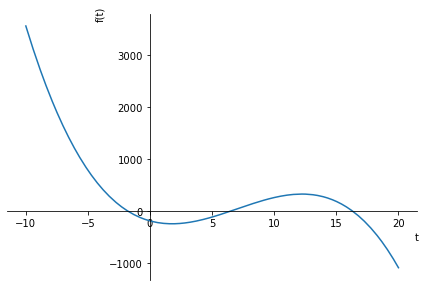

In [9]:
#typr your code here:


#### (b)Use the python to generate a matrix P and a diagonal matrix D. 

- `w, P = np.linalg.eig(A)`
- `D = np.linalg.diag(w)`

- Compare the diagonal entries of D with your graphical estimates for the eigenvalues of A in part (a).

#### Use python to define (the columns of P).

- `p1 = P[:, [0]]`
- `p2 = P[:, [1]]`
- `p3 = P[:, [2]]`
 
#### Calculate

- `A @ p1 - D[0, 0] * p1`
- `A @ p2 - D[1, 1] * p2`
- `A @ p3 - D[2, 2] * p3`

#### What does this calculation tell you about the eigenvalues and eigenvectors of A? 

### ---------------------------------------------------Write your answer here------------------------------------

That shows that eigenvectors "P" didn't affected by the transformation matrix "A" its only scaled by the value of "D" which is called eigenvalue.
That comes from the definition of Eigenvalues and Eigenvectors where Ax = λx .
  



### ------------------------------------------------------------------------------------------------------------------------

In [28]:
#type your code here:
w, P = np.linalg.eig(A)

D = np.diag(w)
p1 = P[:, [0]]
p2 = P[:, [1]]
p3 = P[:, [2]]

print(f"-----P-----\n{P}\n")

print(f"-----D-----\n{D}\n")


print(f"--A @ p1 - D[0, 0] * p1----\n{A @ p1 - D[0, 0] * p1}\n")
print(f"--A @ p2 - D[1, 1] * p2----\n{A @ p1 - D[1, 1] * p2}\n")
print(f"--A @ p3 - D[2, 2] * p3----\n{A @ p3 - D[2, 2] * p3}\n")

-----P-----
[[-0.73347966 -0.3904226  -0.1354093 ]
 [-0.44485372  0.74639214 -0.42926396]
 [-0.51391902 -0.53895174  0.89297076]]

-----D-----
[[12.04811931  0.          0.        ]
 [ 0.         -2.86055424  0.        ]
 [ 0.          0.          0.81243493]]

--A @ p1 - D[0, 0] * p1----
[[1.77635684e-15]
 [3.55271368e-15]
 [3.55271368e-15]]

--A @ p2 - D[1, 1] * p2----
[[-9.95387542]
 [-3.22455549]
 [-7.73345839]]

--A @ p3 - D[2, 2] * p3----
[[5.41233725e-16]
 [0.00000000e+00]
 [4.44089210e-16]]



#### (c) Let A, P, D be as in part (b).

- Verify by python that `A = P @ D @ np.linalg.inv(P)`.
- Use this formula for A to express A<sup>5</sup> and A<sup>10</sup> symbolically in terms of P, P<sup>-1</sup>, D<sup>5</sup> and D<sup>10</sup>.
- Verify your answer to this question numerically using python. Hint: use `np.linalg.matrix_power(A, 5)` to calculate A<sup>5</sup>.

### ---------------------------------------------------Write your answer here------------------------------------

This formula consumes so much computations if we need to power the matrix to higher orders.
By finding the eigenvectors and its inverse P and P^-1 then finding the diagonal matrix of its eigen values, so we can control the power of the matrix by finding the power of the diagonalized matrix.



### ------------------------------------------------------------------------------------------------------------------------

In [30]:
#type your code here:
print(f"-----A------\n{A}\n")
print(f"-----P @ D @ np.linalg.inv(P)------\n{P @ D @ np.linalg.inv(P)}\n")

A_power_5 = np.linalg.matrix_power(A, 5)
x1 = P @ np.linalg.matrix_power(D, 5) @ np.linalg.inv(P)

print(f"-----A^5------\n{A_power_5}\n")
print(f"-----P @ D^5 @ P^-1 ------\n{x1}\n")

A_power_10 = np.linalg.matrix_power(A, 10)
x2 = P @ np.linalg.matrix_power(D, 10) @ np.linalg.inv(P)
print(f"-----A^10------\n{A_power_10}\n")
print(f"-----P @ D^10 @ P^-1 ------\n{x2}\n")



-----A------
[[5. 7. 4.]
 [6. 1. 1.]
 [2. 6. 4.]]

-----P @ D @ np.linalg.inv(P)------
[[5. 7. 4.]
 [6. 1. 1.]
 [2. 6. 4.]]

-----A^5------
[[125589. 121835.  77612.]
 [ 76350.  73681.  46997.]
 [ 87946.  85422.  54400.]]

-----P @ D^5 @ P^-1 ------
[[125589. 121835.  77612.]
 [ 76350.  73681.  46997.]
 [ 87946.  85422.  54400.]]

-----A^10------
[[3.19003641e+10 3.09078327e+10 1.96951858e+10]
 [1.93474627e+10 1.87455697e+10 1.19450990e+10]
 [2.23512823e+10 2.16558361e+10 1.37996027e+10]]

-----P @ D^10 @ P^-1 ------
[[3.19003641e+10 3.09078327e+10 1.96951858e+10]
 [1.93474627e+10 1.87455697e+10 1.19450990e+10]
 [2.23512823e+10 2.16558361e+10 1.37996027e+10]]

